Suppose you are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and then they plan the strategy accordingly.

A)Determine appropriate product pricing.
B)Develop customized marketing campaigns.
c)Design an optimal distribution strategy.
D)Choose specific product features for deployment.
E)Prioritize new product development efforts.

In [1]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
## importing the dataset
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
dataset.drop("CustomerID", axis=1, inplace = True)
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# Exploratory Data Analysis

The range of spending score is more than the annual income score

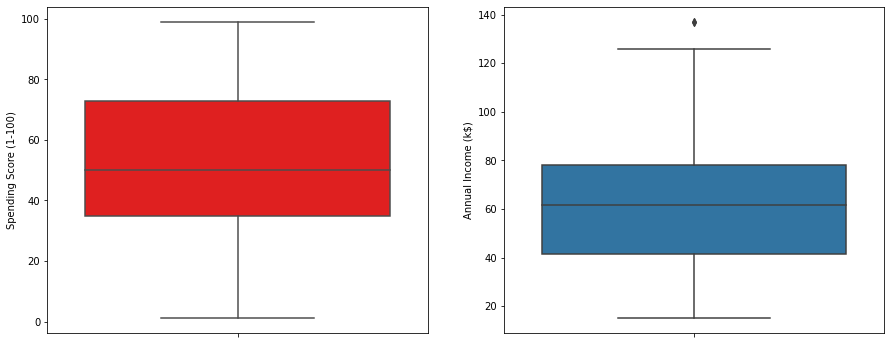

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dataset["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dataset["Annual Income (k$)"])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

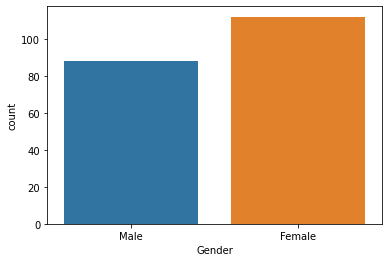

In [10]:
sns.countplot(data=dataset,x=dataset.Gender)

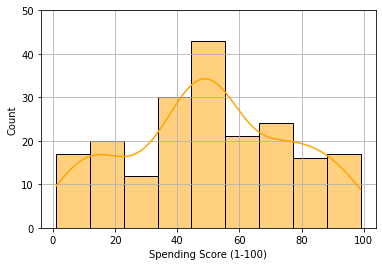

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(dataset['Spending Score (1-100)'],kde=True,color='orange')
plt.yticks(np.arange(0,60,10));
plt.grid()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

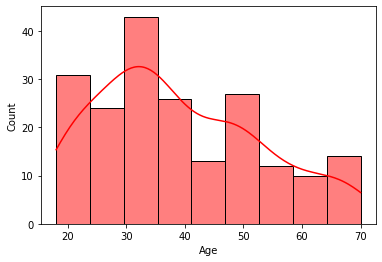

In [12]:
sns.histplot(dataset.Age,kde=True,color='red')

A bar plot to check the distribution of number of customers in each age group. Clearly the 26–35 age group outweighs every other age group.

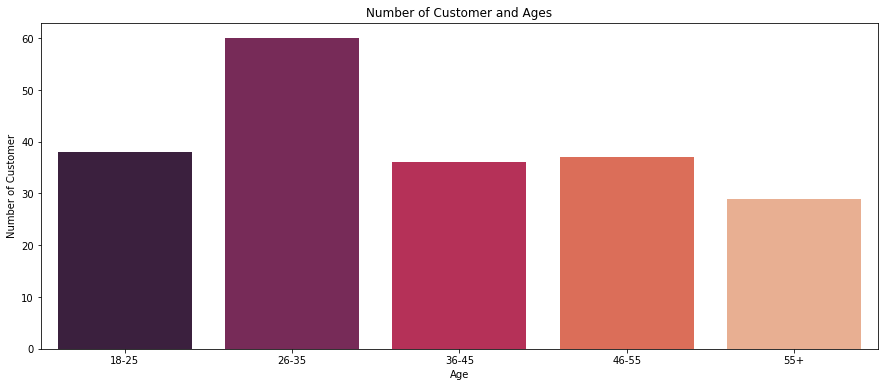

In [13]:
age18_25 = dataset.Age[(dataset.Age <= 25) & (dataset.Age >= 18)]
age26_35 = dataset.Age[(dataset.Age <= 35) & (dataset.Age >= 26)]
age36_45 = dataset.Age[(dataset.Age <= 45) & (dataset.Age >= 36)]
age46_55 = dataset.Age[(dataset.Age <= 55) & (dataset.Age >= 46)]
age55above = dataset.Age[dataset.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

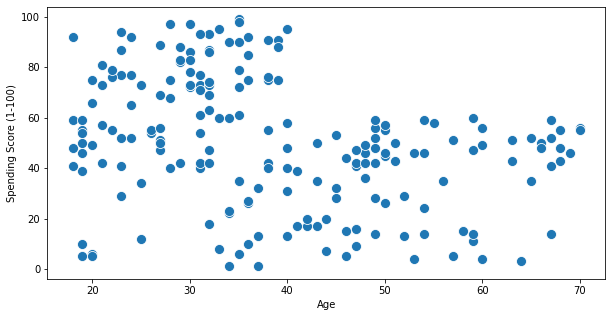

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=dataset['Age'],y=dataset['Spending Score (1-100)'],s=100)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

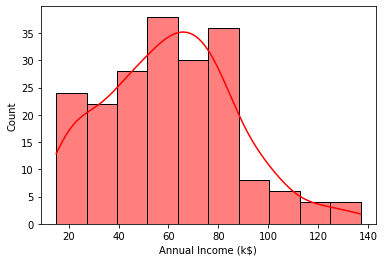

In [15]:
sns.histplot(dataset["Annual Income (k$)"],kde=True,color='red')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

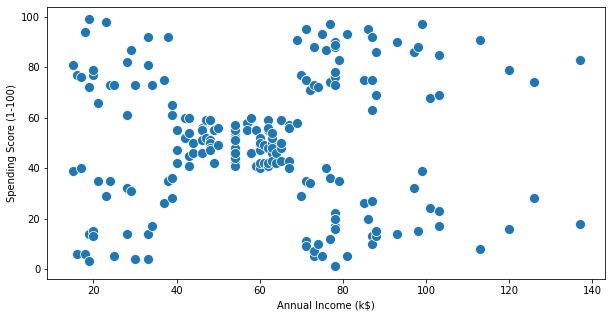

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=dataset["Annual Income (k$)"],y=dataset['Spending Score (1-100)'],s=100)

In [17]:
dataset.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


No correlation is observed. Let us see what clustering can do for us

In [18]:
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [19]:
## This being a clustering problem, We don't need any dependent variable for data pre-processing.
##Currently we have no idea about what to determine. So we will just add a line of code for the matrix of features

xx = dataset.iloc[:, [2, 3]].values  

In [20]:
ssd = []

for k in range(1,11):
    
    model = KMeans(n_clusters=k,init='k-means++',random_state=0)
    
    
    model.fit(xx)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

C:\Users\bverm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


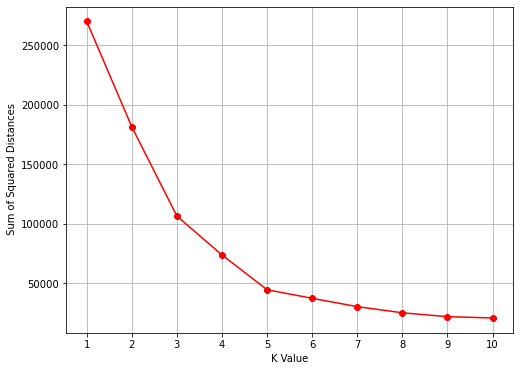

In [21]:
plt.figure(1 , figsize = (8 ,6))
plt.plot(range(1,11),ssd,color="red", marker ="8")
plt.grid()
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.xticks(np.arange(1,11,1));

In [22]:
ssd

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25095.703209997544,
 21830.04197804944,
 20736.67993892413]

In [23]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1   -88617.684040
2   -75015.222897
3   -32668.584023
4   -29231.333592
5    -7182.590243
6    -7006.207998
7    -5163.953997
8    -3265.661232
9    -1093.362039
dtype: float64

The sihoutte score is 0.2968969162503008
The sihoutte score is 0.46761358158775435
The sihoutte score is 0.4931963109249047
The sihoutte score is 0.553931997444648
The sihoutte score is 0.53976103063432
The sihoutte score is 0.5264283703685728
The sihoutte score is 0.4583576977507227
The sihoutte score is 0.4595491760122954
The sihoutte score is 0.44760979994374317


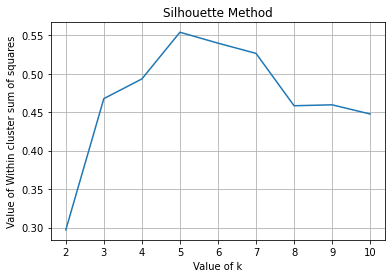

In [24]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(xx)
    labels = kmeans.labels_
    sil.append(silhouette_score(xx, labels, metric = 'euclidean'))
    coef = silhouette_score(xx, labels, metric = 'euclidean')
    print('The sihoutte score is {}'.format(coef))
plt.grid()
plt.plot(range(2,11),sil)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Silhouette Method")
plt.show()

## Doing the silhouette plots

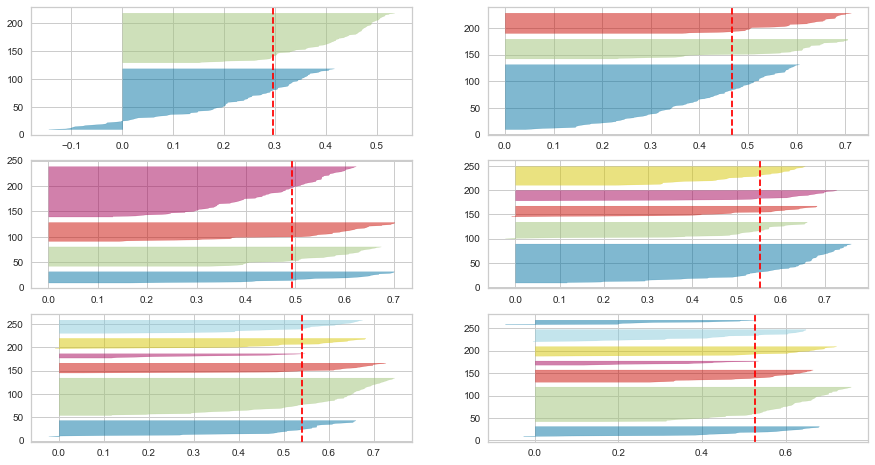

In [25]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(xx)

# Take home aspects of Silhouette coefficients and Silhouette score


1) Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.
2) It takes into consideration the intra-cluster distance between the sample and other data points within the same cluster (i) and inter-cluster distance between the sample and the next nearest cluster (n) and falls within the range [-1, 1].
3) A score of 1 means that the clusters are very dense and nicely separated. A score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
4) The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.
5) The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.


IN the above plot, the silhoutte score for k = 6 is the highest, but the clusters for k = 5 are more uniform compared to k = 6. SO we choose k = 5

In [26]:
####Applying k means with selected value of k and training the K-means model on a dataset  

kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(xx)  

In [27]:
print(y_predict)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


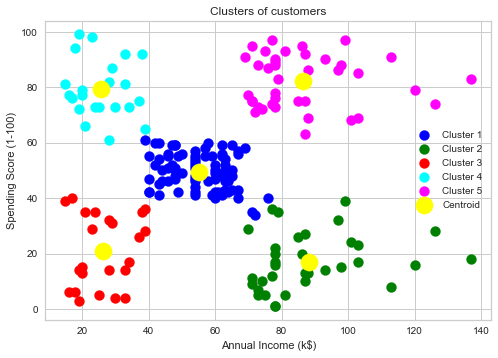

In [28]:
###Visualizing the clusters

#Converting dataframe into array for boolean subsetting purpose for plotting
plt.scatter(xx[y_predict == 0, 0], xx[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(xx[y_predict == 1, 0], xx[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(xx[y_predict== 2, 0], xx[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(xx[y_predict == 3, 0], xx[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(xx[y_predict == 4, 0], xx[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
#plt.scatter(xx[y_predict == 5, 0], xx[y_predict == 5, 1], s = 100, c = 'orange', label = 'Cluster 5') #for sixth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

Had we chosen k = 6, the two extreme pink points would have formed a separate cluster

In [29]:
#### to compare 3 variables altogether

In [30]:
### Taking care of categorical variables
dataset = pd.get_dummies(dataset, drop_first = True)
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [31]:
dataset.drop("Gender_Male", axis=1, inplace = True)
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


C:\Users\bverm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


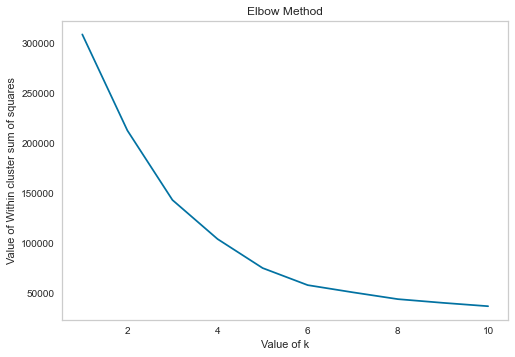

In [32]:
#### applying elbow method like before to find out k
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Elbow Method")
plt.grid()
plt.show()

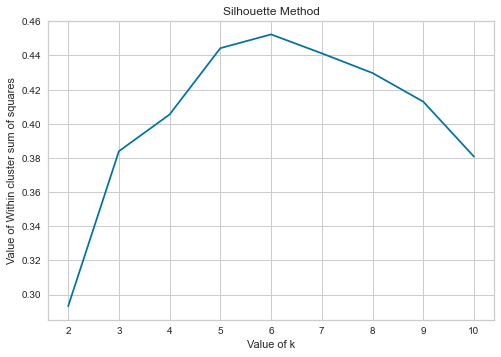

In [33]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(dataset)
    labels = kmeans.labels_
    sil.append(silhouette_score(dataset, labels, metric = 'euclidean'))
    
plt.plot(range(2,11),sil)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Silhouette Method")
plt.show()

In [34]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


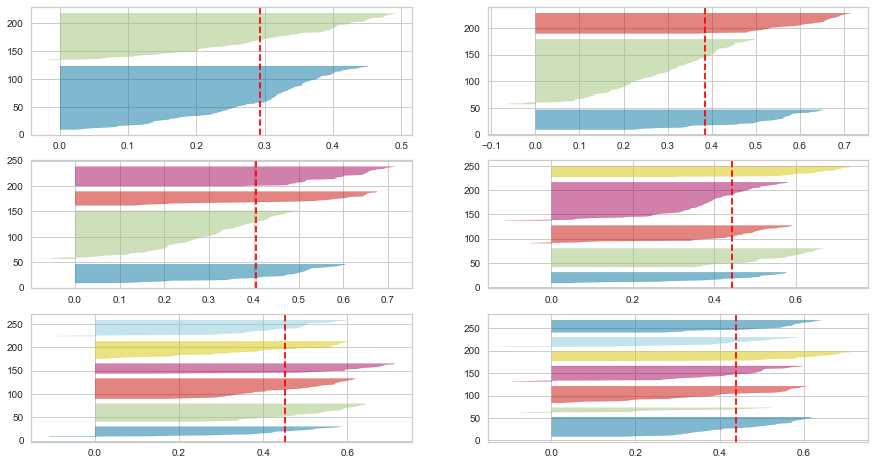

In [35]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dataset)

## Applying the clustering with analysed value of k

In [36]:
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [37]:
kmeans = KMeans(n_clusters= 6)
y_kmeans = kmeans.fit_predict(dataset)

<IPython.core.display.Javascript object>


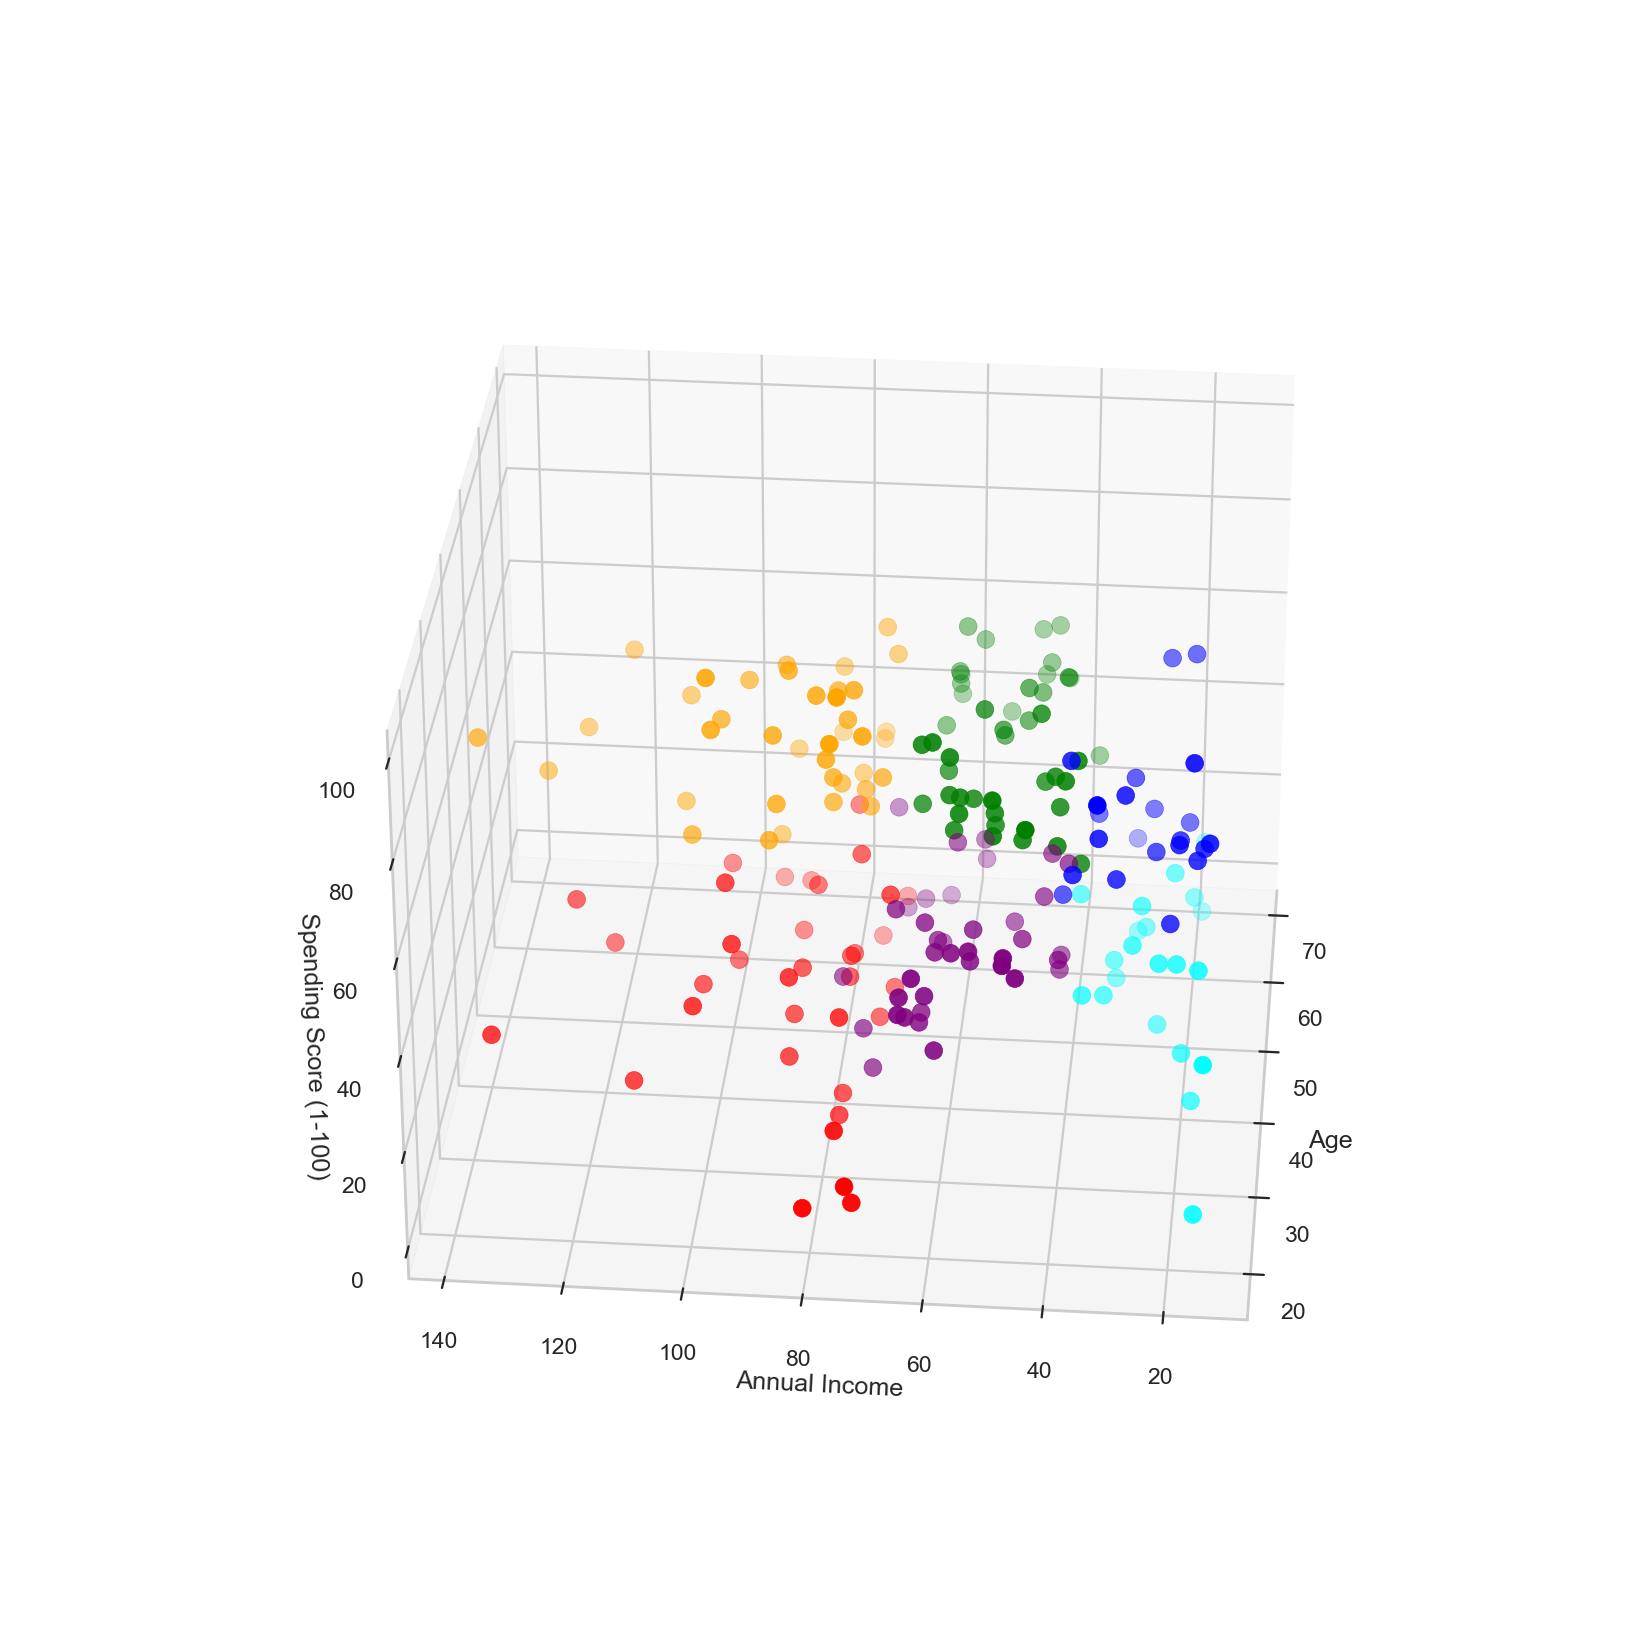

In [39]:
#### visualizing the clustering

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.Age[kmeans.labels_ == 0], dataset["Annual Income (k$)"][kmeans.labels_ == 0], dataset["Spending Score (1-100)"][kmeans.labels_ == 0], c='blue', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 1], dataset["Annual Income (k$)"][kmeans.labels_ == 1], dataset["Spending Score (1-100)"][kmeans.labels_ == 1], c='red', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 2], dataset["Annual Income (k$)"][kmeans.labels_ == 2], dataset["Spending Score (1-100)"][kmeans.labels_ == 2], c='green', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 3], dataset["Annual Income (k$)"][kmeans.labels_ == 3], dataset["Spending Score (1-100)"][kmeans.labels_ == 3], c='orange', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 4], dataset["Annual Income (k$)"][kmeans.labels_ == 4], dataset["Spending Score (1-100)"][kmeans.labels_ == 4], c='purple', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 5], dataset["Annual Income (k$)"][kmeans.labels_ == 5], dataset["Spending Score (1-100)"][kmeans.labels_ == 5], c='cyan', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('Spending Score (1-100)')
plt.show()



## **Looking at the analysis cluster 5 (purple color) are the people who earn high as well as spend high. Also cluster 2 (red color) people spend high but their income is less. Also cluster 1 (blue color) are kind of people who earn less and spend less. For these three classes of people some discount offers can be generated to aim growth in sales.Apart from this cluster 3 people earn high but do spend less. This is a point of concern for management. The reasons for this needs to be found out. It might be products at store , discounts , service etc. Once valid reasons found out management can incorporate solutions for rectifying it which might result in profits.** 
